In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import gc
sns.set()

In [4]:
abs_path = '../../../movilens/'

In [5]:
ratings = pd.read_csv(os.path.join(abs_path, 'rating.csv'))
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [6]:
ratings['timestamp'].min(), ratings['timestamp'].max()

('1995-01-09 11:46:44', '2015-03-31 06:40:02')

In [7]:
ratings['rating'].mean(), ratings['rating'].min(), ratings['rating'].max()

(3.5255285642993797, 0.5, 5.0)

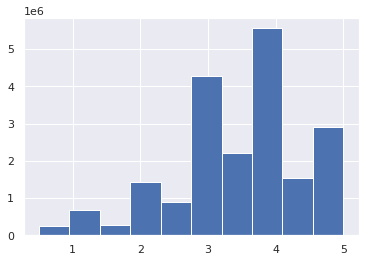

In [8]:
plt.hist(ratings['rating']);

In [9]:
ratings['liked'] = (ratings['rating']>=3.5).astype(int)

In [10]:
ratings['liked'].value_counts()

1    12195566
0     7804697
Name: liked, dtype: int64

In [11]:
ratings['rating'] = ratings['rating'].astype('float16')
ratings.drop(columns='liked',inplace=True)
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float16
 3   timestamp  object 
dtypes: float16(1), int64(2), object(1)
memory usage: 495.9+ MB


In [12]:
ratings.shape

(20000263, 4)

In [13]:
movies_meta = pd.read_csv('../metadata.csv')

In [14]:
movies_meta.head()

,movieId,title,genres,tags,imdbId,primaryName,titleType,isAdult,startYear,averageRating,numVotes
0,1,Toy Story (1995),"['Fantasy', 'Comedy', 'Children', 'Animation',...","['3d', 'action', 'adventure', 'affectionate', ...",tt0114709,"['Tim Allen', 'John Ratzenberger', 'Wallace Sh...",movie,0,1995,8.3,872273
1,2,Jumanji (1995),"['Fantasy', 'Family', 'Comedy', 'Children', 'A...","['action', 'adventure', 'animal movie', 'anima...",tt0113497,"['Bonnie Hunt', 'Bebe Neuwirth', 'Adam Hann-By...",movie,0,1995,7.0,302198
2,3,Grumpier Old Men (1995),"['Romance', 'Comedy']","['chase', 'comedy', 'destiny', 'family', 'good...",tt0113228,"['Richard C. Berman', 'John Campbell', 'Monica...",movie,0,1995,6.7,23870
3,4,Waiting to Exhale (1995),"['Romance', 'Drama', 'Comedy']","['feel good movie', 'feel-good', 'friendship',...",tt0114885,"['Whitney Houston', 'Gregory Hines', ""Kenneth ...",movie,0,1995,5.9,9412
4,5,Father of the Bride Part II (1995),"['Romance', 'Family', 'Comedy']","['chase', 'comedy', 'cute!', 'destiny', 'famil...",tt0113041,"['Rodrigo Botero', 'William Akey', 'Sam Anders...",movie,0,1995,6.1,33982


In [15]:
ratings = ratings.merge(movies_meta, on='movieId', how='inner')

In [16]:
ratings.head()

,userId,movieId,rating,timestamp,title,genres,tags,imdbId,primaryName,titleType,isAdult,startYear,averageRating,numVotes
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),"['Fantasy', 'Family', 'Comedy', 'Children', 'A...","['action', 'adventure', 'animal movie', 'anima...",tt0113497,"['Bonnie Hunt', 'Bebe Neuwirth', 'Adam Hann-By...",movie,0,1995,7.0,302198
1,5,2,3.0,1996-12-25 15:26:09,Jumanji (1995),"['Fantasy', 'Family', 'Comedy', 'Children', 'A...","['action', 'adventure', 'animal movie', 'anima...",tt0113497,"['Bonnie Hunt', 'Bebe Neuwirth', 'Adam Hann-By...",movie,0,1995,7.0,302198
2,13,2,3.0,1996-11-27 08:19:02,Jumanji (1995),"['Fantasy', 'Family', 'Comedy', 'Children', 'A...","['action', 'adventure', 'animal movie', 'anima...",tt0113497,"['Bonnie Hunt', 'Bebe Neuwirth', 'Adam Hann-By...",movie,0,1995,7.0,302198
3,29,2,3.0,1996-06-23 20:36:14,Jumanji (1995),"['Fantasy', 'Family', 'Comedy', 'Children', 'A...","['action', 'adventure', 'animal movie', 'anima...",tt0113497,"['Bonnie Hunt', 'Bebe Neuwirth', 'Adam Hann-By...",movie,0,1995,7.0,302198
4,34,2,3.0,1996-10-28 13:29:44,Jumanji (1995),"['Fantasy', 'Family', 'Comedy', 'Children', 'A...","['action', 'adventure', 'animal movie', 'anima...",tt0113497,"['Bonnie Hunt', 'Bebe Neuwirth', 'Adam Hann-By...",movie,0,1995,7.0,302198


In [17]:
ratings.shape

(20000263, 14)